In [113]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns

In [114]:
df = pd.read_csv("spamTrain1.csv", header=None)

In [115]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0000,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0000,0.0102,0.0011,1
3,0.0000,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.0000,0.0000,-1.0,0.0121,0.0000,0.0,0.0000,0.0000,-1.0000,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,-1.0,0.0000,0.0000,0.0000,0.0000,...,-1.0,0.0,-1.0000,-1.0,-1.0,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,-1.0,0.0000,-1.0,0.0,0.0,0.0000,-1.0000,0.0000,0
1498,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,0.0000,0.0000,0.0000,-1.0000,...,0.0,-1.0,0.0000,0.0,0.0,-1.0,0.0000,0.0000,0.0188,0


<h1>Data Desc</h1>

<p>-1 Implies that the data is missing </p>
<p>Each feature corresponds to a word and denotes the proportion of all words in the email that match the given word</p>


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
 8   8       1500 non-null   float64
 9   9       1500 non-null   float64
 10  10      1500 non-null   float64
 11  11      1500 non-null   float64
 12  12      1500 non-null   float64
 13  13      1500 non-null   float64
 14  14      1500 non-null   float64
 15  15      1500 non-null   float64
 16  16      1500 non-null   float64
 17  17      1500 non-null   float64
 18  18      1500 non-null   float64
 19  19      1500 non-null   float64
 20  20      1500 non-null   float64
 21  21      1500 non-null   float64
 22  

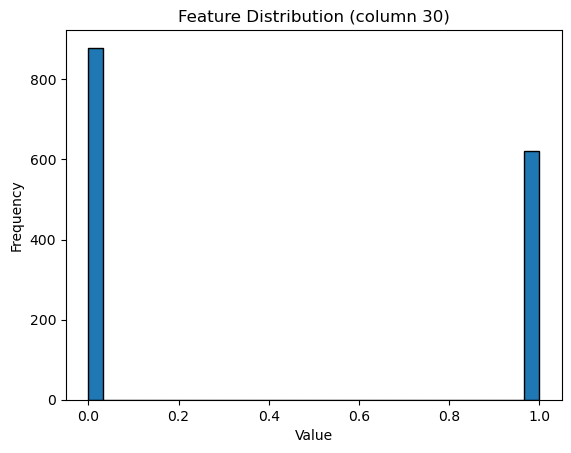

30
0    879
1    621
Name: count, dtype: int64


In [117]:
plt.hist(df[30], bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df[30].value_counts())

In [138]:
# Replace all the -1 with nan
df = df.replace(-1, np.nan)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[df.columns] = imputer.fit_transform(df)

In [139]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.00000,0.0,0.00140,0.00000,0.0,0.00000,0.00000,0.00000,0.0000,...,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0000,0.0029,1.0
1,0.0000,0.00000,0.0,0.00310,0.00044,0.0,0.00000,0.00044,0.00000,0.0000,...,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0031,0.0094,1.0
2,0.0000,0.00408,0.0,0.00450,0.00092,0.0,0.00000,0.01590,0.00000,0.0022,...,0.00092,0.0,0.00880,0.0,0.0,0.00000,0.00578,0.0102,0.0011,1.0
3,0.0000,0.00500,0.0,0.00290,0.00000,0.0,0.00000,0.00000,0.00000,0.0000,...,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0000,0.0133,1.0
4,0.0100,0.00000,0.0,0.00000,0.00000,0.0,0.01250,0.00000,0.00000,0.0000,...,0.00000,0.0,0.00930,0.0,0.0,0.00000,0.00000,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0000,0.00000,0.0,0.01210,0.00000,0.0,0.00000,0.00000,0.00032,0.0243,...,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0060,0.0000,1.0
1496,0.0091,0.00330,0.0,0.00000,0.00910,0.0,0.00000,0.00000,0.00000,0.0000,...,0.00020,0.0,0.00198,0.0,0.0,0.00000,0.00000,0.0000,0.0000,0.0
1497,0.0000,0.00030,0.0,0.00000,0.00000,0.0,0.00276,0.00000,0.00000,0.0000,...,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0000,0.0000,0.0
1498,0.0000,0.00000,0.0,0.01014,0.00000,0.0,0.00000,0.00000,0.00000,0.0000,...,0.00000,0.0,0.00000,0.0,0.0,0.00740,0.00000,0.0000,0.0188,0.0


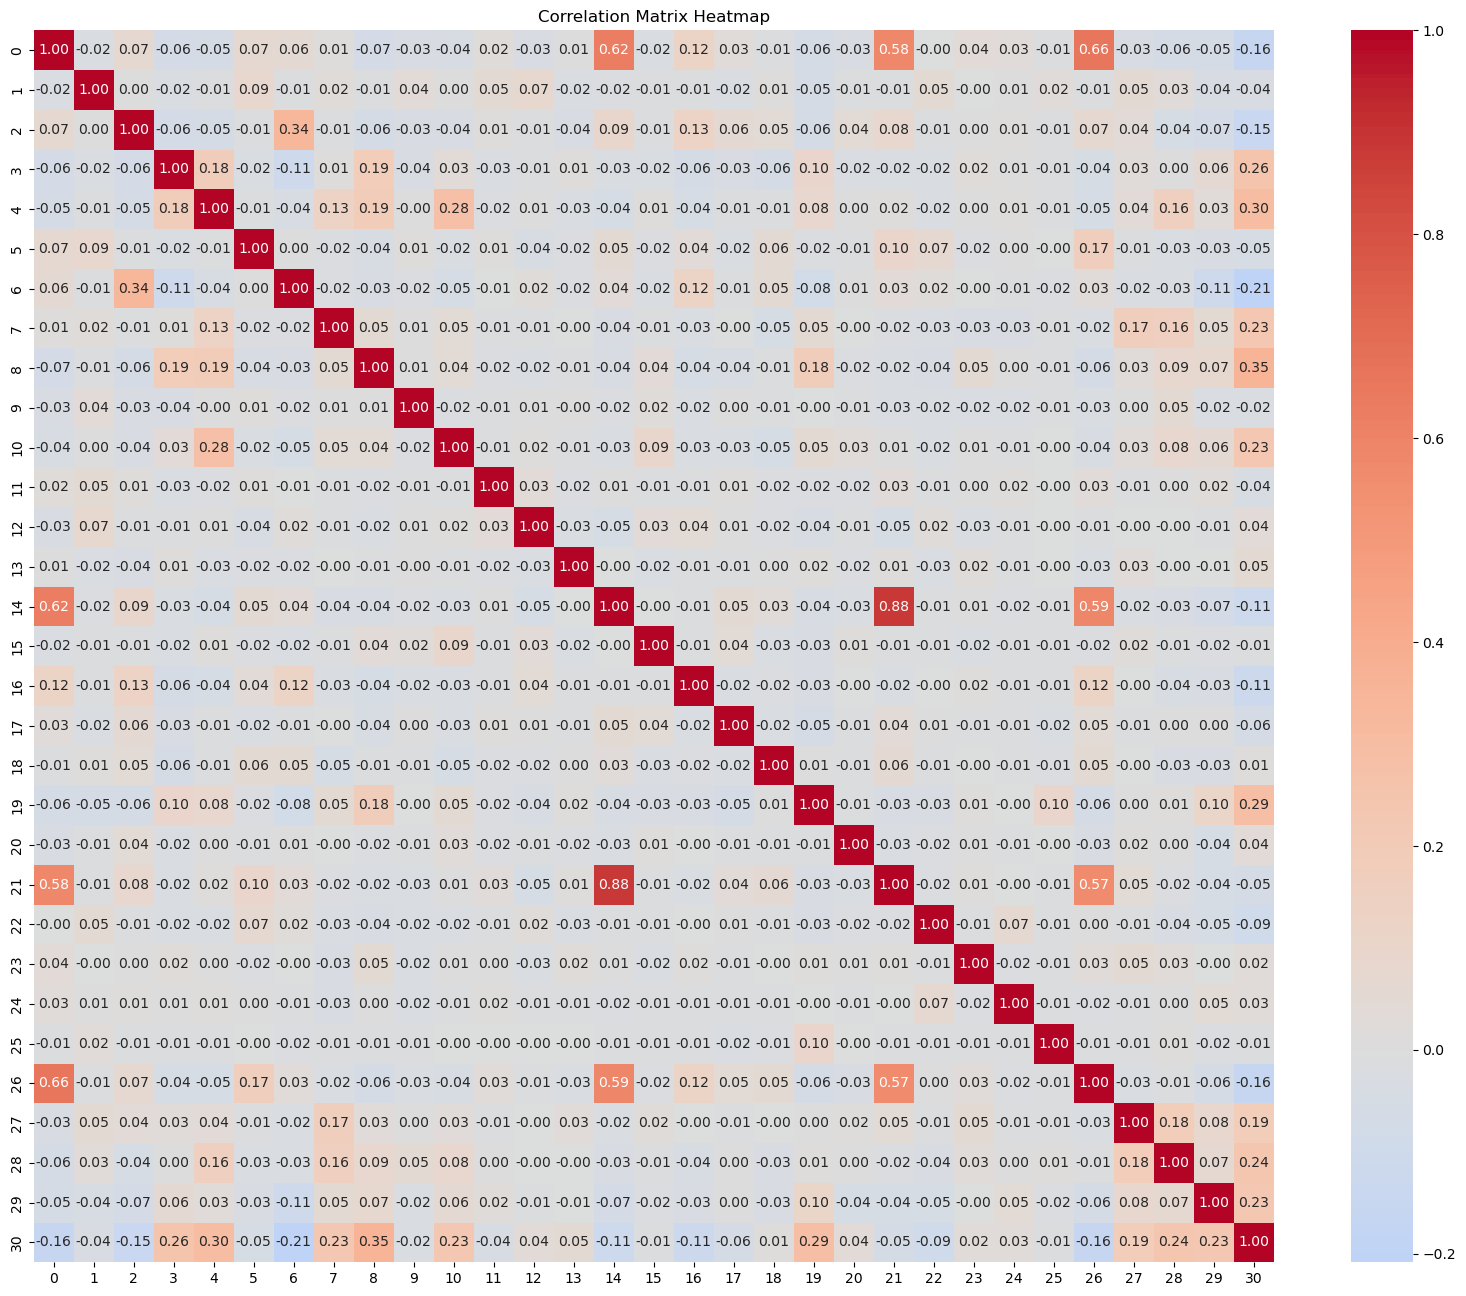

In [140]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


<h2>pandas.DataFrame.corr</h2>
<p> Compute pairwise correlation of columns, excluding NA/null values.</p>
<p>Clearly some columns are very similar in terms of linear relationship. We might interpet this as "words commonly used together" because the data represents the proportion of words found in a given email  </p>

In [141]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.000916,0.001001,0.000453,0.003108,0.001513,0.000929,0.001165,0.002208,0.001186,0.002105,...,0.000587,0.000635,0.001809,0.001637,0.000101,0.000878,0.000396,0.000920,0.003169,0.414000
std,0.004479,0.003259,0.002299,0.005965,0.004524,0.005464,0.003306,0.005466,0.003635,0.012134,...,0.003178,0.005213,0.005155,0.011393,0.001983,0.004294,0.002066,0.002823,0.005186,0.492713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000620,0.000000
75%,0.000000,0.000300,0.000000,0.004100,0.000800,0.000000,0.000000,0.002000,0.000000,0.000260,...,0.000000,0.000000,0.001100,0.000000,0.000000,0.000000,0.000000,0.000000,0.004650,1.000000
max,0.058800,0.046800,0.035700,0.062500,0.071400,0.100000,0.045400,0.075500,0.054000,0.142800,...,0.047600,0.166600,0.090900,0.171000,0.074000,0.058800,0.023800,0.052600,0.043400,1.000000


In [142]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [143]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
 8   8       1500 non-null   float64
 9   9       1500 non-null   float64
 10  10      1500 non-null   float64
 11  11      1500 non-null   float64
 12  12      1500 non-null   float64
 13  13      1500 non-null   float64
 14  14      1500 non-null   float64
 15  15      1500 non-null   float64
 16  16      1500 non-null   float64
 17  17      1500 non-null   float64
 18  18      1500 non-null   float64
 19  19      1500 non-null   float64
 20  20      1500 non-null   float64
 21  21      1500 non-null   float64
 22  

<h2>Dealing with NaNs</h2>
<p>We will have to use some imputation methods to deal with the missing values</p>
<p>Cannot drop misisng values, (99.8% data decrease), Impute mean or median or use regression technques </p>
<p>Split data into train and valudation. I don't believe that we need to scale the features due to them already being scaled by proportion </p>

In [144]:
features_mean_imputation = features.fillna(features.mean())
features_median_imputation = features.fillna(features.median()) # Basically filling NaN with 0's 

In [145]:
from sklearn.model_selection import train_test_split

In [203]:
X_train,X_val, y_train, y_val = train_test_split(features_mean_imputation,target,test_size=0.15, random_state=42,shuffle=True)

In [204]:
y_val

1116    0.0
1368    0.0
422     0.0
413     0.0
451     0.0
       ... 
1231    1.0
917     0.0
743     0.0
570     0.0
218     0.0
Name: 30, Length: 225, dtype: float64

In [227]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc


In [228]:
models = {
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RidgeClassifier": RidgeClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier( 
        eval_metric='logloss', 
        random_state=42,
        max_depth=2,
        min_child_weight=10,# limit tree depth
        n_estimators=50, # smaller number of trees
        learning_rate=0.05,
        subsample=0.8,    # row sampling
        colsample_bytree=0.8, # column sampling
        reg_alpha=2,    # L1 regularization
        reg_lambda=3      # L2 regularization
    )
}

In [229]:

def tpr_at_fpr(y_true, y_score, fpr_target=0.01):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    # Interpolate TPR at the target FPR
    return np.interp(fpr_target, fpr, tpr)


In [230]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    aucs = []
    tprs = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        
        # Some models output probabilities, some don't
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_val)[:, 1]
        else:
            y_scores = model.decision_function(X_val)
        
        aucs.append(roc_auc_score(y_val, y_scores))
        tprs.append(tpr_at_fpr(y_val, y_scores, fpr_target=0.01))
    
    results[name] = {
        "Mean AUC": np.mean(aucs),
        "Mean TPR@1%FPR": np.mean(tprs)
    }
    print(f"Model: {name} | AUC: {aucs} | TPRS: {tprs}\n\n")

results


Model: GaussianNB | AUC: [0.8983644859813085, 0.8735160394038898, 0.8662541045718615, 0.8570661783278605, 0.8946387976761808] | TPRS: [0.2259190031152648, 0.11342056074766355, 0.1410841121495327, 0.09879839786381842, 0.15214953271028037]


Model: LogisticRegression | AUC: [0.7966026774437989, 0.8420687042182369, 0.8585501389239707, 0.8675170497600404, 0.8988380904268755] | TPRS: [0.17757009345794392, 0.17757009345794392, 0.14018691588785046, 0.08411214953271028, 0.17757009345794392]


Model: RidgeClassifier | AUC: [0.8154205607476636, 0.8530563273553927, 0.8644228340490022, 0.8739580702197525, 0.8991538267239202] | TPRS: [0.17757009345794392, 0.18691588785046728, 0.1308411214953271, 0.08411214953271028, 0.16822429906542055]


Model: DecisionTree | AUC: [0.8330070724930537, 0.8415635261429654, 0.8576660772922455, 0.850119979792877, 0.8529931800959838] | TPRS: [0.061878996556812595, 0.055955819881053526, 0.06293457943925233, 0.05145420560747664, 0.0622429906542056]


Model: SVM | AUC: [0

{'GaussianNB': {'Mean AUC': 0.8779679211922202,
  'Mean TPR@1%FPR': 0.14627432131731197},
 'LogisticRegression': {'Mean AUC': 0.8527153321545844,
  'Mean TPR@1%FPR': 0.1514018691588785},
 'RidgeClassifier': {'Mean AUC': 0.8612023238191464,
  'Mean TPR@1%FPR': 0.14953271028037382},
 'DecisionTree': {'Mean AUC': 0.847069967163425,
  'Mean TPR@1%FPR': 0.05889331842776013},
 'SVM': {'Mean AUC': 0.9267491790856276, 'Mean TPR@1%FPR': 0.4149532710280373},
 'XGBoost': {'Mean AUC': 0.9406668350593586,
  'Mean TPR@1%FPR': 0.5457943925233645}}

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

aucs = []

for train_idx, val_idx in cv.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)
    
    model = SVC(probability=True, random_state=42)
    model.fit(X_tr_scaled, y_tr)
    
    y_scores = model.predict_proba(X_val_scaled)[:, 1]
    aucs.append(roc_auc_score(y_val, y_scores))

print("Mean train AUC per fold (scaled):", np.mean(aucs))


Mean train AUC per fold (scaled): 0.9318514776458702


In [235]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

svm = SVC(probability=True, random_state=42)

grid = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=5)
grid.fit(X_scaled, y_train)

tprs.append(tpr_at_fpr(y_val, y_scores_val, fpr_target=0.01))


print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)
# After running the loop
print("SVM TPR@1%FPR per fold:", tprs)  # when model name == "SVM"


Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV AUC: 0.9418413740843647
SVM TPR@1%FPR per fold: [0.5700934579439252, 0.5233644859813084, 0.7289719626168224, 0.2336448598130841, 0.6728971962616822, 0.18691588785046728]


In [236]:
df_results = pd.DataFrame(results).T.sort_values(by="Mean AUC", ascending=False)
print(df_results)


                    Mean AUC  Mean TPR@1%FPR
XGBoost             0.940667        0.545794
SVM                 0.926749        0.414953
GaussianNB          0.877968        0.146274
RidgeClassifier     0.861202        0.149533
LogisticRegression  0.852715        0.151402
DecisionTree        0.847070        0.058893


In [234]:
#OVERFITTING CHECK 
# Scale the train and validation sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # if you have a separate validation set

# Train SVM with best parameters
final_svm = SVC(
    C=10,
    gamma=0.01,
    kernel='rbf',
    probability=True,
    random_state=42
)
final_svm.fit(X_train_scaled, y_train)

# Predict probabilities
y_train_scores = final_svm.predict_proba(X_train_scaled)[:, 1]
y_val_scores   = final_svm.predict_proba(X_val_scaled)[:, 1]

# Compute AUC
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(y_train, y_train_scores)
val_auc   = roc_auc_score(y_val, y_val_scores)

print(f"Train AUC: {train_auc}")
print(f"Validation AUC: {val_auc}")


Train AUC: 0.9671356403132104
Validation AUC: 0.9714574387471584


In [155]:
auc

<function sklearn.metrics._ranking.auc(x, y)>

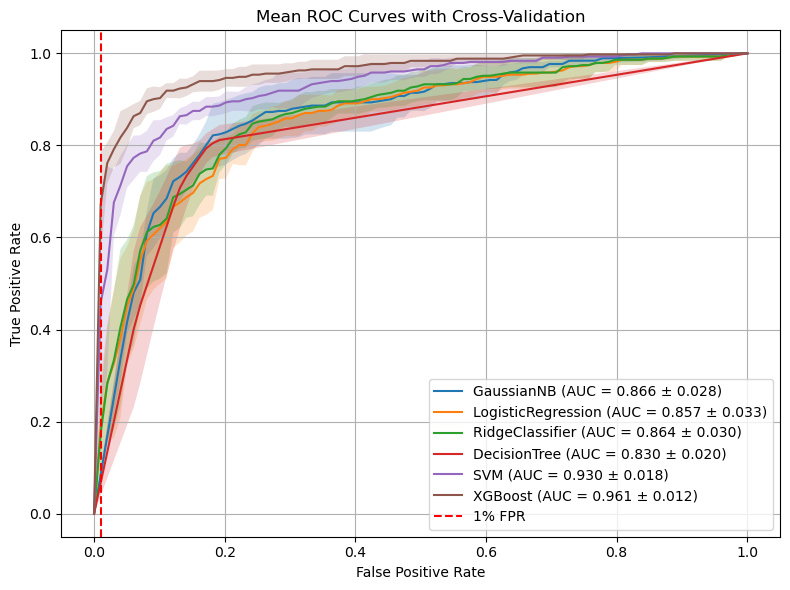

In [174]:
def plot_mean_roc(model, X, y, n_splits=5, label=None):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_idx, val_idx in cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X.iloc[val_idx])[:, 1]
        else:
            y_score = model.decision_function(X.iloc[val_idx])
            
        fpr, tpr, _ = roc_curve(y.iloc[val_idx], y_score)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        fold_auc = auc(fpr, tpr)
        aucs.append(fold_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, label=f"{label} (AUC = {mean_auc:.3f} ± {std_auc:.3f})")
    plt.fill_between(mean_fpr,
                     np.maximum(mean_tpr - np.std(tprs, axis=0), 0),
                     np.minimum(mean_tpr + np.std(tprs, axis=0), 1),
                     alpha=0.2)

plt.figure(figsize=(8, 6))

for name, model in models.items():
    plot_mean_roc(model, X_train, y_train, label=name)

plt.axvline(x=0.01, color='red', linestyle='--', label='1% FPR')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Mean ROC Curves with Cross-Validation")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


10-fold cross-validation mean AUC:  0.8216676855824521
Test set AUC:  0.801125554850983


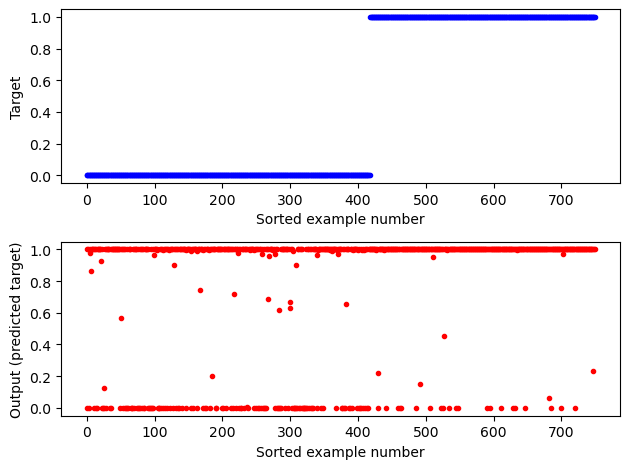

In [135]:
# -*- coding: utf-8 -*-
"""
Demo of 10-fold cross-validation using Gaussian naive Bayes on spam data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def aucCV(features,labels):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    scores = cross_val_score(model,features,labels,cv=10,scoring='roc_auc')
    return scores
def predictTest(trainFeatures,trainLabels,testFeatures):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    data = np.loadtxt('spamTrain1.csv',delimiter=',')
    # Separate labels (last column)
    features = data[:,:-1]
    labels = data[:,-1]
    # Evaluating classifier accuracy using 10-fold cross-validation
    print("10-fold cross-validation mean AUC: ",
    np.mean(aucCV(features,labels)))
    # Arbitrarily choose all odd samples as train set and all even as test set
    # then compute test set AUC for model trained only on fixed train set
    trainFeatures = features[0::2,:]
    trainLabels = labels[0::2]
    testFeatures = features[1::2,:]
    testLabels = labels[1::2]
    testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
    print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))
    # Examine outputs compared to labels
    sortIndex = np.argsort(testLabels)
    nTestExamples = testLabels.size
    plt.subplot(2,1,1)
    plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Target')
    plt.subplot(2,1,2)
    plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Output (predicted target)')
    plt.tight_layout()
    plt.show()


Test set AUC: 0.8213626872630704
TPR at FPR = 0.01: 0.11277777777777777


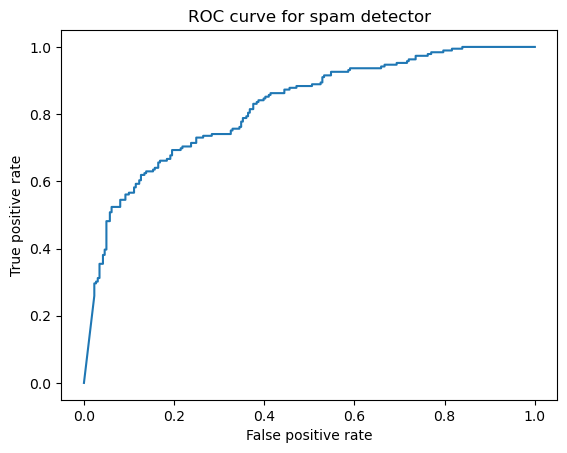

In [95]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain2.csv'
#testDataFilename = 'spamTest.csv'
def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr

"""
trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')
# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]
"""
## ******************* REPLACING HIS FEATURES WITH X_TRAIN Y_TRAIN ***************
trainFeatures = X_train
trainLabels = y_train
testFeatures = X_test
testLabels = y_test

testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()


Test set AUC: 0.8323834543352772
TPR at FPR = 0.01: 0.12267310789049919


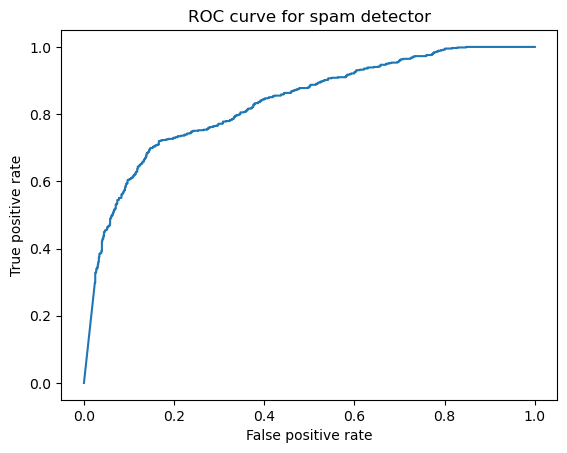

In [5]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
#from classifySpam import predictTest
desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain1.csv'
#testDataFilename = 'spamTest.csv'
def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr
trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')
# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]
testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()

10-fold cross-validation mean AUC:  0.8216676855824521
Test set AUC:  0.801125554850983


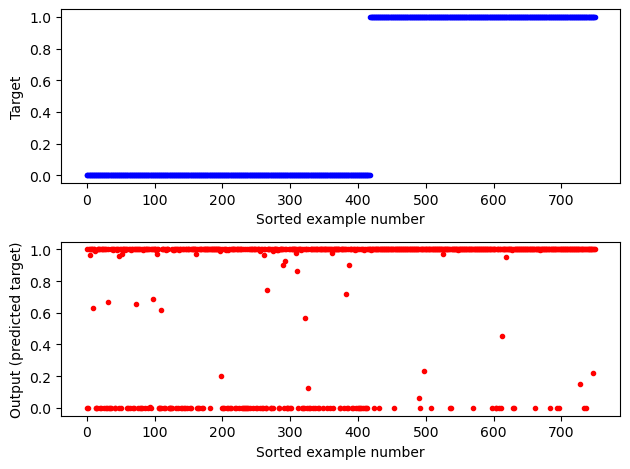

In [3]:
# -*- coding: utf-8 -*-
"""
Demo of 10-fold cross-validation using Gaussian naive Bayes on spam data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def aucCV(features,labels):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    scores = cross_val_score(model,features,labels,cv=10,scoring='roc_auc')
    return scores
def predictTest(trainFeatures,trainLabels,testFeatures):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs

    
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    data = np.loadtxt('spamTrain1.csv',delimiter=',')
    # Separate labels (last column)
    features = data[:,:-1]
    labels = data[:,-1]
    # Evaluating classifier accuracy using 10-fold cross-validation
    print("10-fold cross-validation mean AUC: ",
    np.mean(aucCV(features,labels)))
    # Arbitrarily choose all odd samples as train set and all even as test set
    # then compute test set AUC for model trained only on fixed train set
    trainFeatures = features[0::2,:]
    trainLabels = labels[0::2]
    testFeatures = features[1::2,:]
    testLabels = labels[1::2]
    testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
    print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))
    # Examine outputs compared to labels
    sortIndex = np.argsort(testLabels)
    nTestExamples = testLabels.size
    plt.subplot(2,1,1)
    plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Target')
    plt.subplot(2,1,2)
    plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Output (predicted target)')
    plt.tight_layout()
    plt.show()
